In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

D:\python\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\python\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
D:\python\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
df = pd.read_csv('Data/US-MMS_short.csv')
#df['datetime'] = pd.to_datetime(df[['YEAR','MONTH','DAY','HOUR']])

## 1. Time series visualization

### (a) Solution 1: using self-defined dailyAvg function

In [ ]:
# dailyAvg returns the average of hourly value for each windowsize
# we can use this function to calculate daily temperature
'''
def dailyAvg(a, windowsize):
    Nday = len(a)//windowsize
    dailyP = np.mean(np.reshape(np.array(a)[0:Nday*windowsize], [Nday, windowsize]), axis=1)
    return dailyP
'''

# dailyAvg returns the sum of hourly value for each windowsize
# we can use this function to calculate daily precipitation
# the return of dailySum equals to the return of dailyAvg multiplied by 24
'''
def dailySum(a, windowsize):
    Nday = len(a)//windowsize
    dailyP = np.sum(np.reshape(np.array(a)[0:Nday*windowsize], [Nday, windowsize]), axis=1)
    return dailyP
'''

In [13]:
# the similar function as the dailyAvg
def calStat(var, windowsize):
    N = len(var)//windowsize
    Avg = np.nanmean(np.reshape(np.array(var)[0:N*windowsize], [N, windowsize]), axis=1)
    varAvg = Avg.mean()
    varSd = np.nanstd(Avg)
    return varAvg,varSd

In [14]:
# without considering the different number of days per month and different number of days per year
# the results here are not super precise
hour_TA, sd_hour_TA = calStat(df['TA'], 1)
day_TA, sd_day_TA = calStat(df['TA'], 24)
month_TA, sd_month_TA = calStat(df['TA'], 24*31)
year_TA, sd_year_TA = calStat(df['TA'], 24*31*12)

In [15]:
print(hour_TA,sd_hour_TA)
print(day_TA,sd_day_TA)
print(month_TA,sd_month_TA)
print(year_TA,sd_year_TA)

12.395734340390339 10.78299365910306
12.400291219762666 10.375899685866651
12.425777024708307 9.250830492947882
12.250589524275007 0.8161669505197394


Text(0, 0.5, 'Air Temperature ($^\\circ$C)')

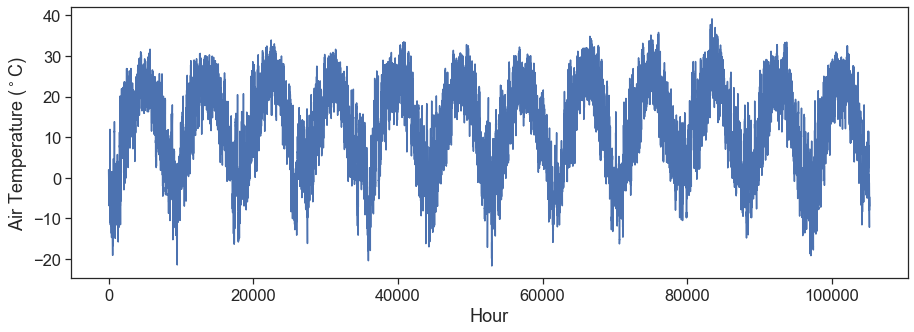

In [6]:
sns.set(style='ticks', font_scale=1.5)
plt.figure(figsize=(15,5))
plt.plot(hour_TA)
plt.xlabel('Hour')
plt.ylabel('Air Temperature ($^\circ$C)')

Text(0, 0.5, 'Air Temperature ($^\\circ$C)')

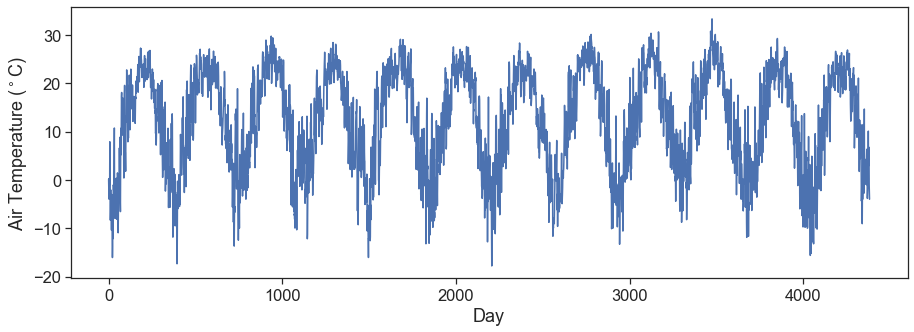

In [7]:
sns.set(style='ticks', font_scale=1.5)
plt.figure(figsize=(15,5))
plt.plot(day_TA)
plt.xlabel('Day')
plt.ylabel('Air Temperature ($^\circ$C)')

Text(0, 0.5, 'Air Temperature ($^\\circ$C)')

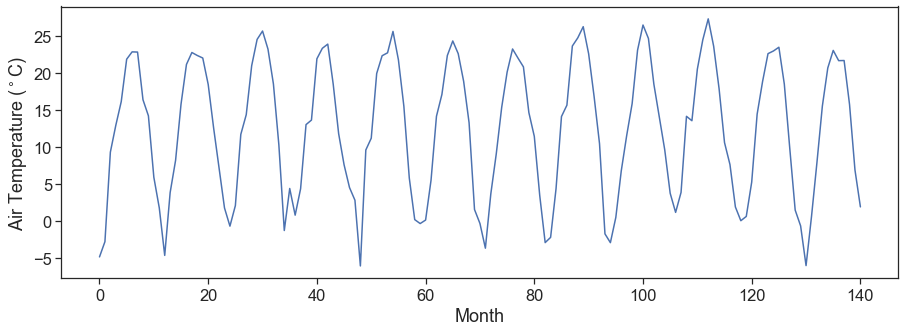

In [8]:
sns.set(style='ticks', font_scale=1.5)
plt.figure(figsize=(15,5))
plt.plot(month_TA)
plt.xlabel('Month')
plt.ylabel('Air Temperature ($^\circ$C)')

Text(0, 0.5, 'Air Temperature ($^\\circ$C)')

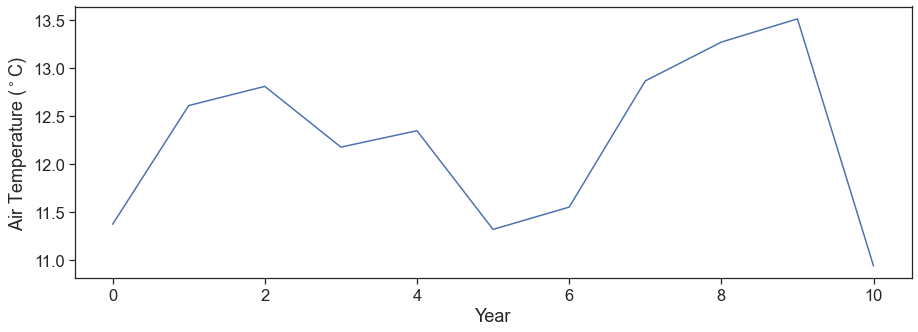

In [9]:
sns.set(style='ticks', font_scale=1.5)
plt.figure(figsize=(15,5))
plt.plot(year_TA)
plt.xlabel('Year')
plt.ylabel('Air Temperature ($^\circ$C)')

### (a) solution 2: using groupby and built-in functions

Text(0, 0.5, 'Air Temperature ($^\\circ$C)')

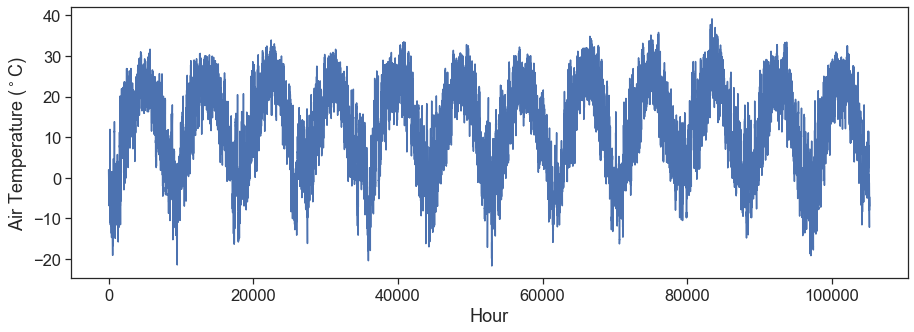

In [10]:
hour_TA2 = df['TA'].values
sd_hour_TA2 = np.nanstd(hour_TA2)
plt.figure(figsize=(15,5))
plt.plot(hour_TA2)
plt.xlabel('Hour')
plt.ylabel('Air Temperature ($^\circ$C)')

Text(0, 0.5, 'Air Temperature ($^\\circ$C)')

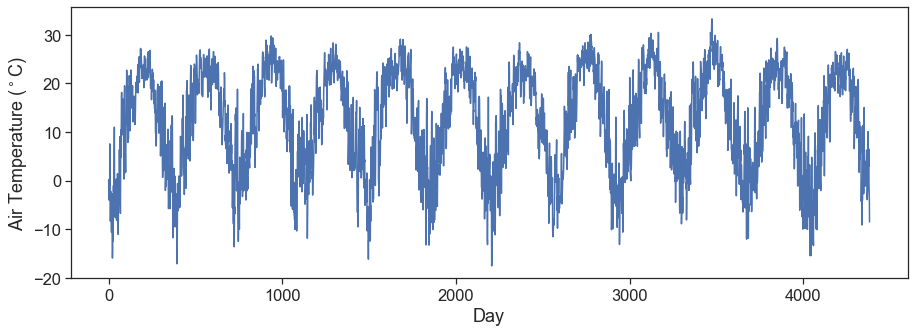

In [11]:
day_df = df.groupby(by=['YEAR','MONTH','DAY']).mean()
day_TA2 = day_df['TA'].values
sd_day_TA2 = np.nanstd(day_TA2)
sns.set(style='ticks', font_scale=1.5)
plt.figure(figsize=(15,5))
plt.plot(day_TA2)
plt.xlabel('Day')
plt.ylabel('Air Temperature ($^\circ$C)')

Text(0, 0.5, 'Air Temperature ($^\\circ$C)')

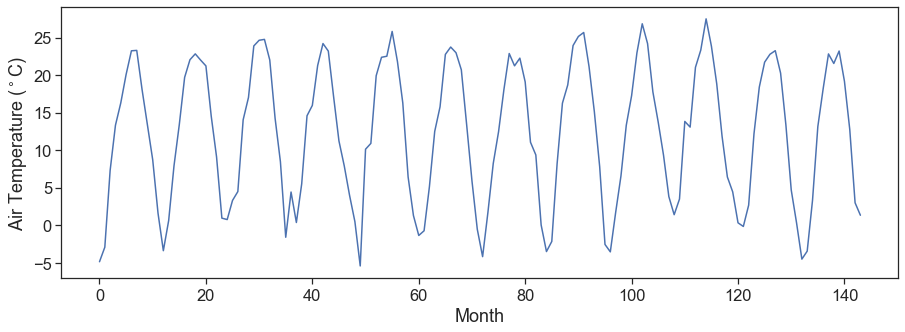

In [12]:
month_df = df.groupby(by=['YEAR','MONTH']).mean()
month_TA2 = month_df['TA'].values
sd_month_TA2 = np.nanstd(month_TA2)
sns.set(style='ticks', font_scale=1.5)
plt.figure(figsize=(15,5))
plt.plot(month_TA2)
plt.xlabel('Month')
plt.ylabel('Air Temperature ($^\circ$C)')

Text(0, 0.5, 'Air Temperature ($^\\circ$C)')

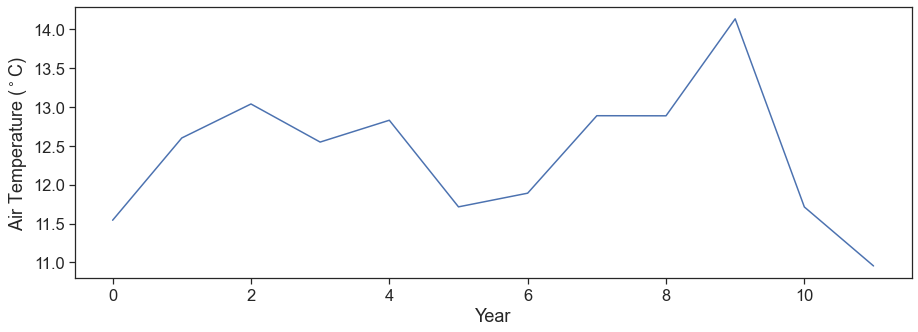

In [13]:
year_df = df.groupby(by=['YEAR']).mean()
year_TA2 = year_df['TA'].values
sd_year_TA2 = np.nanstd(year_TA2)
sns.set(style='ticks', font_scale=1.5)
plt.figure(figsize=(15,5))
plt.plot(year_TA2)
plt.xlabel('Year')
plt.ylabel('Air Temperature ($^\circ$C)')

In [14]:
print(sd_hour_TA2)
print(sd_day_TA2)
print(sd_month_TA2)
print(sd_year_TA2)

10.78299365910306
10.377679002446285
9.280893252760281
0.8242474605413442


### (b)

As the time scale increases (from hourly to annually), the standard deviation decreases, indicating less variability in temperature.
The hourly and daily standard deviations are high because temperatures fluctuate a lot within a single day due to natural diurnal cycles (e.g., daytime heating and nighttime cooling). 
As you average the temperatures over a longer period (monthly), short-term fluctuations (like daily or hourly variations) are smoothed out. Therefore, the standard deviation is lower than on the hourly or daily scale.
Averaging over an entire year reduces the variability even more, as seasonal fluctuations (summer vs. winter) are smoothed out when considering annual means. 

## 2. Probabilities

### (a)

In [17]:
# probability of hourly air temperature falling below 0
rf = len(df[df['TA']<0])/len(df)
print(rf)

0.15798880132330712


Text(0, 0.5, 'Density')

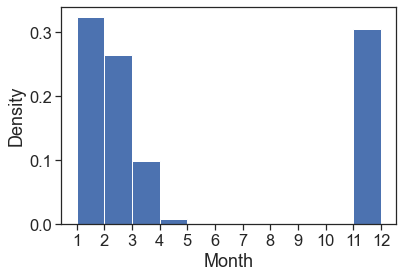

In [18]:
freeze_df = df[df['TA']<0]
plt.hist(freeze_df['MONTH'],bins = np.arange(1, 13, 1),density=True)
plt.xticks(np.arange(1, 13, 1))
plt.xlabel('Month')
plt.ylabel('Density')

### (b)

In [19]:
snow_fraction = freeze_df['P'].sum()/df['P'].sum()
snow_fraction

0.005345717277444719

### (c)

In [34]:
df9 = df[df['MONTH'] ==9]
df9_daily_sum = df9.groupby(['YEAR','MONTH','DAY']).sum()
df9_daily_mean = df9.groupby(['YEAR','MONTH','DAY']).mean()

pvar = df9_daily_sum['P'].values
rvar = df9_daily_mean['RH'].values

rainy_day = pvar[pvar>1]  # depend on your threshold
rh_rainy_day = rvar[pvar>1]
rh_over_70 = rh_rainy_day[rh_rainy_day>70]

p = len(rh_over_70)/len(rainy_day)
print(p)

0.9054054054054054


## 3. Distributions

### (a)

In [4]:
day_df = df.groupby(by=['YEAR','MONTH','DAY']).sum()
day_df = day_df.reset_index()
n_wet = np.zeros(len(day_df['YEAR'].unique()))
for idx, year in enumerate(day_df['YEAR'].unique()):
    n_wet[idx] = len(day_df[(day_df['YEAR'] == year)&(day_df['P']>1)])

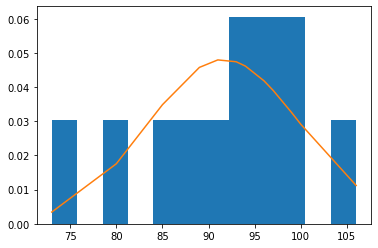

In [5]:
# binomial distribution
from scipy.stats import binom
day_df = df.groupby(by=['YEAR','MONTH','DAY']).sum()
day_P = np.array(day_df['P'].values)
n_wet = np.sort(n_wet)
n = 365
p = len(day_P[day_P>1])/len(day_P)
plt.hist(n_wet,bins = 12, density=True)
plt.plot(n_wet, binom.pmf(n_wet, n, p))

### (b)

(array([9.46337270e-02, 5.90105958e-03, 2.93848681e-03, 1.05978213e-03,
        5.05805107e-04, 1.68601702e-04, 2.16773617e-04, 7.22578725e-05,
        0.00000000e+00, 2.40859575e-05, 0.00000000e+00, 2.40859575e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.40859575e-05]),
 array([  0.    ,   9.4725,  18.945 ,  28.4175,  37.89  ,  47.3625,
         56.835 ,  66.3075,  75.78  ,  85.2525,  94.725 , 104.1975,
        113.67  , 123.1425, 132.615 , 142.0875, 151.56  , 161.0325,
        170.505 , 179.9775, 189.45  ]),
 <BarContainer object of 20 artists>)

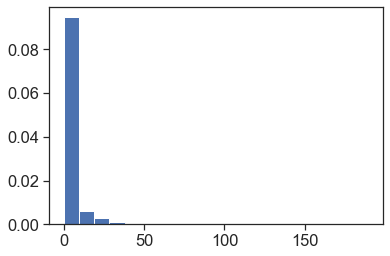

In [23]:
day_P = day_df['P']
plt.hist(day_P,bins = 20,density=True)

In [24]:
from scipy.stats import skew
mean = np.nanmean(day_P)
sd = np.nanstd(day_P)
skewness = skew(day_P)
print(mean)
print(sd)
print(skewness)

2.9443524982888434
8.248285787247333
6.393307574966663


### (c)

Text(0, 0.5, 'Density')

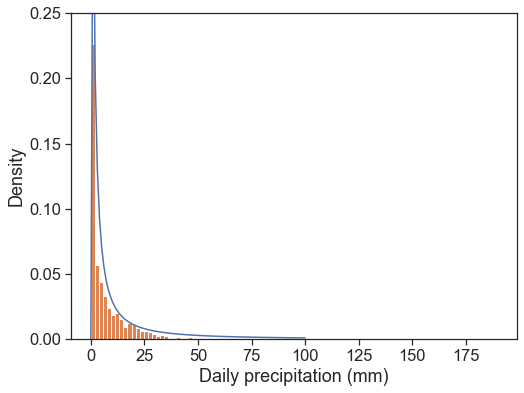

In [44]:
from scipy.stats import genextreme
rainy_P = day_P[day_P > 0]
# p shape, loc, scale
shape,loc, scale = genextreme.fit(rainy_P)
plt.figure(figsize=(8,6))
plt.plot(np.linspace(0, 100, 100),genextreme.pdf(np.linspace(0, 50, 100),shape, loc, scale))
plt.hist(rainy_P, bins = 100, density=True)
plt.ylim([0, 0.25])
plt.xlabel('Daily precipitation (mm)')
plt.ylabel('Density')

In [36]:
shape,loc, scale = genextreme.fit(rainy_P)
print(shape)
print(loc)
print(scale)

-0.7332732490118663
4.654972204006739
4.233755026880073


### (d)

In [37]:
# assume the probability of daily precipitation exceeding 40mm as p40
p40_fitted = 1 - genextreme.cdf(40,shape,loc,scale)
print(p40_fitted)

0.06644323252408646


In [38]:
p40_data = len(rainy_P[rainy_P > 40])/len(rainy_P)
print(p40_data)

0.03535811423390753


### Discussion
The frequency of raw data gives a lower probability of precipitation exceeding 40 mm compared to the fitted distribution. This discrepancy could be due to the limitations in fitting a theoretical distribution to real data, especially when dealing with extreme values or small sample sizes.
- The generalized extreme value (GEV) distribution might not perfectly fit the tail of the data (extreme precipitation values). Extreme precipitation events (like those exceeding 40 mm) are rare, and fitting a distribution to rare events can sometimes lead to overestimation or underestimation, depending on the quality of the fit.
- The discrepancy may also arise from the number of observed extreme values in the raw data. If there are few days with precipitation over 40 mm, the sample size may not be large enough to accurately capture the true probability, while the fitted distribution tries to generalize based on the model parameters.

## 4. Hypotheses testing

### (a)

H0: the average forest greenness during the drought is not significantly lower than that before the drought \
H1: the average forest greenness during the drought is significantly lower than that before the drought \
alpha = 0.05 \
Test statistics Z = (avg(vi_dur) - avg(vi_bfr))/(std(vi_bfr)/sqrt(300)) \
pvalue is less than 0.05, suggesting that given H0 is true, the probability of observing Z or a more extreme Z is nearly 0, but we did observe such a Z, suggesting we need to reject H0

In [39]:
import math
from scipy import stats
vi = pd.read_csv('Greenness_pine_forest_CA.csv')
vi_bfr = vi.iloc[0:300,:]
vi_dur = vi.iloc[300:,:]
z = (vi_dur['NDVI'].mean() - vi_bfr['NDVI'].mean())/(vi_bfr['NDVI'].std()/math.sqrt(300))
p_z = stats.norm.cdf(z, 0, 1)
print(p_z)

2.883511055328828e-193


In [40]:
z

-29.632110337174964

### (b)

In [41]:
z_threshold = stats.norm.ppf(0.05)
vi_threhold = z_threshold*(vi_bfr['NDVI'].std()/math.sqrt(300))+vi_bfr['NDVI'].mean()
print(vi_threhold)

0.6420816344690659
